# 감정분석 모델

# Step 1. 데이터 수집
## 1-1. csv파일로 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_file.csv')
df

,문장,감정
0,내가 좋아하는 유튜버가 좋은 제품이라고 하길래 나도 샀지. 그런데 그게 돈 받고 하...,0
1,그래서 사람들이 증거 사진을 올렸더니 그 때서야 광고였다고 미안하다고 하는 거야.,0
2,처음부터 자기 잘못을 알고 미안하다고 했으면 화가 이렇게 나진 않았을 거야. 사람들...,0
3,내 휴가가 엉망진창이 돼버렸어.,0
4,휴가 시작함과 동시에 장마도 같이 시작해버렸어. 그래서 하루 종일 비가 와.,0
...,...,...
52112,입사 초반에는 인간관계가 힘들었는데 이제 좀 편안해진 것 같아.,3
52113,빨리 결혼식을 하고 싶어.,3
52114,이번에 무사히 출산했어. 정말 다행이야.,3
52115,아이가 뛰어놀다가 넘어져서 깜짝 놀랐었어.,3


In [3]:
label_count = df['감정'].value_counts()
print(label_count)

감정
0    13680
2    13574
1    12976
3    11887
Name: count, dtype: int64


In [4]:
data_list = []
target_list = []

for q,  label in zip(df['문장'], df['감정']):
    data_list.append(q)
    target_list.append(label)

In [5]:
from konlpy.tag import Kkma

kkma = Kkma()

tokenized_data = []

for s in data_list:
    text_2 = [word for word, pos in kkma.pos(s) if (pos == 'NNG') or (pos == 'VV') or (pos == 'NP') or (pos == 'VA') or (pos == 'MAG')] # 조사 또는 문장부호는 빼줌
    #if text_2:  # 빈 리스트가 아닌 경우에만 추가
    tokenized_data.append(text_2)

In [6]:
print(kkma.pos(data_list[0]))
print(data_list[0])
print(tokenized_data[0])
print(target_list[0])

[('나', 'NP'), ('가', 'JKS'), ('좋아하', 'VV'), ('는', 'ETD'), ('유튜버', 'UN'), ('가', 'JKS'), ('좋', 'VA'), ('은', 'ETD'), ('제품', 'NNG'), ('이', 'VCP'), ('라고', 'ECD'), ('하', 'VV'), ('길래', 'ECD'), ('나도', 'NNG'), ('사', 'VV'), ('었', 'EPT'), ('지', 'EFN'), ('.', 'SF'), ('그러', 'VV'), ('ㄴ', 'ETD'), ('데', 'NNB'), ('그', 'VA'), ('게', 'ECD'), ('돈', 'NNG'), ('받', 'VV'), ('고', 'ECE'), ('하', 'VV'), ('는', 'ETD'), ('광고였대잖', 'UN'), ('아', 'JKI'), ('.', 'SF')]
내가 좋아하는 유튜버가 좋은 제품이라고 하길래 나도 샀지. 그런데 그게 돈 받고 하는 광고였대잖아.
['나', '좋아하', '좋', '제품', '하', '나도', '사', '그러', '그', '돈', '받', '하']
0


In [7]:
from collections import Counter

# 전체 데이터에 대한 단어 빈도수 계산
word_counts = Counter(word for sentence in tokenized_data for word in sentence)

# 빈도수에 따라 단어를 정렬
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 상위 N개의 단어로 단어 사전 만들기
top_words = [word for word, count in sorted_words[:500]]
word_to_index = {word: idx for idx, word in enumerate(top_words)}

# 모든 데이터를 숫자로 변환
num_tokenized_data = [[word_to_index.get(word, 0) for word in sentence] for sentence in tokenized_data]

In [8]:
print(word_to_index)

{'하': 0, '나': 1, '너무': 2, '친구': 3, '같': 4, '되': 5, '있': 6, '없': 7, '내': 8, '안': 9, '좋': 10, '보': 11, '일': 12, '내가': 13, '요즘': 14, '사람': 15, '힘들': 16, '정말': 17, '받': 18, '듣': 19, '가': 20, '집': 21, '슬프': 22, '오늘': 23, '못': 24, '회사': 25, '알': 26, '걱정': 27, '생각': 28, '다': 29, '많이': 30, '돈': 31, '기분': 32, '아내': 33, '오': 34, '남편': 35, '때': 36, '이번': 37, '잘': 38, '우리': 39, '모르': 40, '말': 41, '마음': 42, '건강': 43, '부모님': 44, '이제': 45, '살': 46, '결혼': 47, '많': 48, '지금': 49, '나이': 50, '불안': 51, '학교': 52, '엄마': 53, '더': 54, '아프': 55, '몸': 56, '왜': 57, '나오': 58, '그러': 59, '자꾸': 60, '직장': 61, '먹': 62, '화': 63, '짜증': 64, '가족': 65, '좀': 66, '생기': 67, '기쁘': 68, '준비': 69, '만나': 70, '아들': 71, '자식': 72, '계속': 73, '어떻': 74, '취업': 75, '당하': 76, '그리하': 77, '낳': 78, '스트레스': 79, '싫': 80, '화가': 81, '공부': 82, '아이': 83, '죽': 84, '사': 85, '날': 86, '주식': 87, '크': 88, '혼자': 89, '갑자기': 90, '아직': 91, '나가': 92, '그렇': 93, '들': 94, '떨어지': 95, '남자': 96, '속상하': 97, '성적': 98, '아빠': 99, '애': 100, '같이': 101, '전': 102, '무섭': 103

In [9]:
# 상위 500개의 단어 선택
top_words = [word for word, count in word_counts.most_common(500)]

# 상위 500개의 단어에 대한 빈도수 출력
for word in top_words:
    print(f'{word}: {word_counts[word]}번')

하: 15767번
나: 15443번
너무: 9449번
친구: 6133번
같: 5471번
되: 5365번
있: 4958번
없: 4853번
내: 4535번
안: 4260번
좋: 4231번
보: 3817번
일: 2944번
내가: 2883번
요즘: 2579번
사람: 2498번
힘들: 2432번
정말: 2366번
받: 2337번
듣: 2325번
가: 2227번
집: 2041번
슬프: 2023번
오늘: 2016번
못: 2008번
회사: 1972번
알: 1924번
걱정: 1913번
생각: 1819번
다: 1733번
많이: 1715번
돈: 1694번
기분: 1662번
아내: 1662번
오: 1628번
남편: 1627번
때: 1623번
이번: 1610번
잘: 1604번
우리: 1501번
모르: 1475번
말: 1470번
마음: 1437번
건강: 1399번
부모님: 1389번
이제: 1307번
살: 1303번
결혼: 1301번
많: 1294번
지금: 1274번
나이: 1255번
불안: 1239번
학교: 1213번
엄마: 1185번
더: 1138번
아프: 1128번
몸: 1118번
왜: 1107번
나오: 1104번
그러: 1092번
자꾸: 1062번
직장: 1062번
먹: 1030번
화: 1011번
짜증: 989번
가족: 967번
좀: 959번
생기: 958번
기쁘: 952번
준비: 948번
만나: 939번
아들: 914번
자식: 903번
계속: 899번
어떻: 892번
취업: 889번
당하: 887번
그리하: 881번
낳: 864번
스트레스: 858번
싫: 852번
화가: 842번
공부: 819번
아이: 815번
죽: 806번
사: 785번
날: 769번
주식: 769번
크: 764번
혼자: 764번
갑자기: 761번
아직: 756번
나가: 753번
그렇: 752번
들: 750번
떨어지: 749번
남자: 745번
속상하: 737번
성적: 736번
아빠: 735번
애: 726번
같이: 719번
전: 710번
무섭: 705번
맞: 702번
우울: 691번
드디어: 688번
끝나: 

In [10]:
import numpy as np
lengths = np.array([len(x) for x in num_tokenized_data])
print(np.mean(lengths), np.median(lengths))

8.050501755665138 8.0


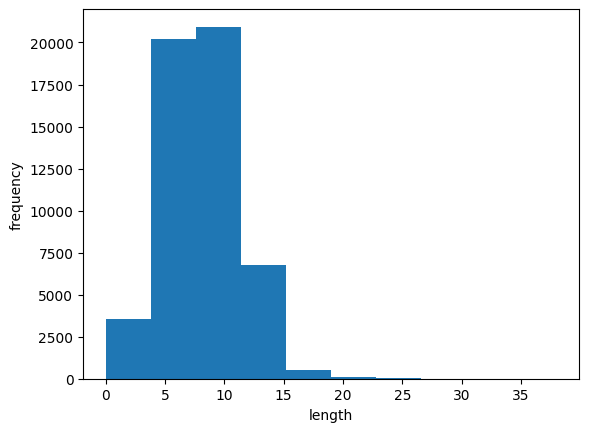

In [11]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(num_tokenized_data, maxlen = 10)

print(train_seq.shape)


(52117, 10)


In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train_seq, target_list, test_size = 0.2, random_state = 42)

In [14]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [15]:
train_target = np.array(train_target)
val_target = np.array(val_target)
test_target = np.array(test_target)

print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

print(train_target.shape)
print(val_target.shape)
print(test_target.shape)

(33354, 10)
(8339, 10)
(10424, 10)
(33354,)
(8339,)
(10424,)


# Step 2. 모델

## 2-1. 모델 학습

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=128, input_length=10))
model.add(GRU(128, dropout=0.3, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax')) # 클래스의 개수에 맞게 설정


initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)

optimizer = SGD(learning_rate=lr_schedule)

# 모델 컴파일
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# 모델 학습
history = model.fit(train_input, train_target, epochs=300, batch_size=256,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/300


131/131 [==============================] - 12s 47ms/step - loss: 1.4421 - accuracy: 0.3658 - val_loss: 1.3963 - val_accuracy: 0.2654
Epoch 2/300
  3/131 [..............................] - ETA: 5s - loss: 1.2572 - accuracy: 0.4062

C:\Users\kikikiju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 7s 54ms/step - loss: 1.2372 - accuracy: 0.4384 - val_loss: 1.3678 - val_accuracy: 0.2944
Epoch 3/300
131/131 [==============================] - 8s 63ms/step - loss: 1.1724 - accuracy: 0.4760 - val_loss: 1.2802 - val_accuracy: 0.3847
Epoch 4/300
131/131 [==============================] - 7s 54ms/step - loss: 1.1335 - accuracy: 0.4983 - val_loss: 1.1393 - val_accuracy: 0.5292
Epoch 5/300
131/131 [==============================] - 6s 49ms/step - loss: 1.0975 - accuracy: 0.5213 - val_loss: 1.0423 - val_accuracy: 0.5663
Epoch 6/300
131/131 [==============================] - 7s 54ms/step - loss: 1.0728 - accuracy: 0.5355 - val_loss: 0.9803 - val_accuracy: 0.5953
Epoch 7/300
131/131 [==============================] - 8s 59ms/step - loss: 1.0561 - accuracy: 0.5464 - val_loss: 0.9656 - val_accuracy: 0.5912
Epoch 8/300
131/131 [==============================] - 7s 55ms/step - loss: 1.0427 - accuracy: 0.5542 - val_loss: 0.9418 - val_accuracy: 0.6058
Epoc

## 2-2. 모델 평가

In [17]:
# 패딩이 완료된 테스트 데이터
test_input = pad_sequences(test_input, maxlen=8)

loss, accuracy = model.evaluate(test_input, test_target)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

326/326 [==============================] - 1s 3ms/step - loss: 0.7855 - accuracy: 0.6709
Test Loss: 0.785527229309082
Test Accuracy: 0.670855700969696


# STEP 3. 문장에서 감정분석 하기

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from konlpy.tag import Kkma

# Assuming 'model' and 'word_to_index' are defined before this code

# Load the Kkma tokenizer
kkma = Kkma()

def tokenize_and_pad(sentence, tokenizer, word_to_index, max_length=10):
    input_tokens = [word for word, pos in tokenizer.pos(sentence) if (pos == 'NNG') or (pos == 'VV') or (pos == 'NP') or (pos == 'VA') or (pos == 'MAG')]
    input_indices = [word_to_index.get(word, 0) for word in input_tokens]
    padded_input = pad_sequences([input_indices], maxlen=max_length)
    return padded_input

# 사용 예시
while True:
    input_sentence = input()
    if input_sentence == '0':
        break

    padded_input = tokenize_and_pad(input_sentence, kkma, word_to_index)

    predicted_probabilities = model.predict(padded_input)
    predicted_class = np.argmax(predicted_probabilities)

    emotions = ['분노', '슬픔', '불안', '행복']
    predicted_emotion = emotions[predicted_class]

    print(f"입력 문장: {input_sentence}")
    print(f"예측된 감정: {predicted_emotion}")
    print(f"각 클래스의 확률: {predicted_probabilities[0]}")


1/1 [==============================] - 0s 30ms/step
입력 문장: 엄마한테 혼났어
예측된 감정: 슬픔
각 클래스의 확률: [0.27343827 0.3478831  0.25848356 0.12019516]
1/1 [==============================] - 0s 30ms/step
입력 문장: 엄마한테 용돈받았어
예측된 감정: 행복
각 클래스의 확률: [0.15158467 0.29469588 0.09977803 0.45394143]
1/1 [==============================] - 0s 31ms/step
입력 문장: 시험 잘 봤을까
예측된 감정: 분노
각 클래스의 확률: [0.27869982 0.25073212 0.21561885 0.2549492 ]
1/1 [==============================] - 0s 28ms/step
입력 문장: 시험 잘 봤어
예측된 감정: 분노
각 클래스의 확률: [0.27869982 0.25073212 0.21561885 0.2549492 ]
